In [0]:
#import libraries that I think I will need for the lab
import math 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [0]:
"""
Question 1 - generating a function to generate an array of the random walk trajectory (1D)
Function is F(n,p,delta) where: n = number of walks, p = probability of forward trajectory, delta = step size
"""
def rand_walk_traj(n,p,delta):
  i = 0 #set initial value
  traj = np.array([]) #create an empty array to store data
  while i<n:
    if np.random.rand(1)<p: #if the number generated is within the positive walk threshold
      traj = np.append(traj, delta) #append the positive walk trajectory
    else:
      traj = np.append(traj, -delta) #append the negative walk trajectory, since it is out of the positive walk threshold
    i+=1

  return traj

In [0]:
rand_walk_traj(25,0.6,1) #shows the walk trajectories under the input conditions


array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.])

In [0]:
""" 
Question 2 - Essentially do the same code as above, but make the iterate within the array
"""
def rand_walk_traj_bool(n,p,delta): #same input parameters as the original
  traj = np.random.rand(n) #create numpy array of random numbers
  traj_prob = traj < p #if less than p, walks +, else walks -
  traj_prob = traj_prob.astype('int')
  traj_prob_walk = ((traj_prob*2)-1)*delta #convert to +/- 1, and multiply by delta

  return traj_prob, traj_prob_walk

In [0]:
#Test
rand_walk_traj_bool(25,0.6,3)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1]),
 array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3, -3, -3,  3, -3, -3,  3,  3,
        -3,  3,  3,  3,  3, -3, -3,  3]))

In [0]:
""" 
Question 3 - Plot Random walks and show stochastically the <x^2> = 2Dt correlation as number of steps increase
Goal - plot 100 different random walks with 100 steps and show the correlation
From the lab and lecture notes, the random walk equation for distance is: <x(n)> = n*delta^2
time = number of time steps*tau where: tau = time step value
"""
def mean_squared_gen(n,p,delta): #going to make a function which does the 100 iterations and yields the mean square
  mean_squares = [] #make an empty list for the mean squares
  timestep = [] #empty list for the time steps
  for i in range(n):
    trajbool, traj = rand_walk_traj_bool(i,p,delta)
    s = math.sqrt(i*sum(traj**2)) #<x(n)^2> = n*delta^2
    mean_squares.append(s)
    timestep.append(i)
  return mean_squares, timestep


Text(0.5, 0, 'Time')

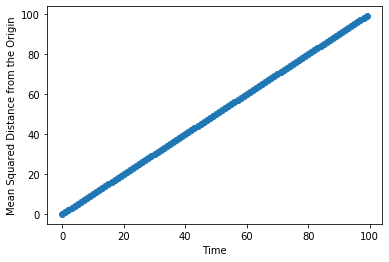

In [0]:
walk_distances, timevalues = mean_squared_gen(n=100,p=0.5,delta=1) #assume tau = timestep value = 1
#walk_distances
plt.scatter(timevalues,walk_distances)
plt.ylabel('Mean Squared Distance from the Origin')
plt.xlabel('Time')